In [8]:
# Importing packages 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models, losses
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
import pandas as pd
import tensorflow_datasets as tfds
import os

In [9]:
datapath= os.path.join('COVID-19_Radiography_Dataset')

In [ ]:
start = "train"
end = ".jpg"

In [ ]:
CATEGORIES = ["COVID","Lung_Opacity","Normal","Viral Pneumonia"] 

NameError: name 'training_data' is not defined

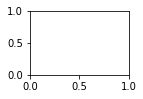

In [10]:
plt.rcParams['figure.figsize'] = (7,7)
 #Plot some datas to visualize the dataset
for i in range(0,9): 
  plt.subplot(3,3,1+i)
  plt.imshow(training_data[i])
print("SAMPLE DATASET")
plt.show()

In [ ]:
df = pd.read_csv('label.csv')
df.columns = ["number","classes"]
df

,number,classes
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
21160,21160,3
21161,21161,3
21162,21162,3
21163,21163,3


In [ ]:
labels=df.iloc[: , -1].tolist()
len(labels)

21165

In [ ]:
numbers = list(df.number)
classes = list(df.classes)

In [ ]:
from PIL import Image 
import PIL 
for i in range(len(classes)):
  filename = start + str(numbers[i]) + end
  path = datapath +"/"+ filename
  dest = datapath + "/" + CATEGORIES[classes[i]] + "/" + filename
  # creating a image object (main image) 
  im1 = Image.open(path) 
  # save a image using extension
  im1 = im1.save(dest)

NameError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.3)
# load train data
train_dir =  "/content/drive/MyDrive/images"
# load validation data
val_dir = "/content/drive/MyDrive/images"
# load train data
train = datagen.flow_from_directory(train_dir, target_size = (224,224),batch_size = 32, class_mode = 'categorical',subset='training')
val = datagen.flow_from_directory(val_dir, target_size = (224,224),batch_size = 32, class_mode = 'categorical',subset='validation')
#test = datagen.flow_from_directory(train_dir, target_size = (100,100),batch_size = 100, class_mode = categorical)

Found 14755 images belonging to 4 classes.
Found 6320 images belonging to 4 classes.


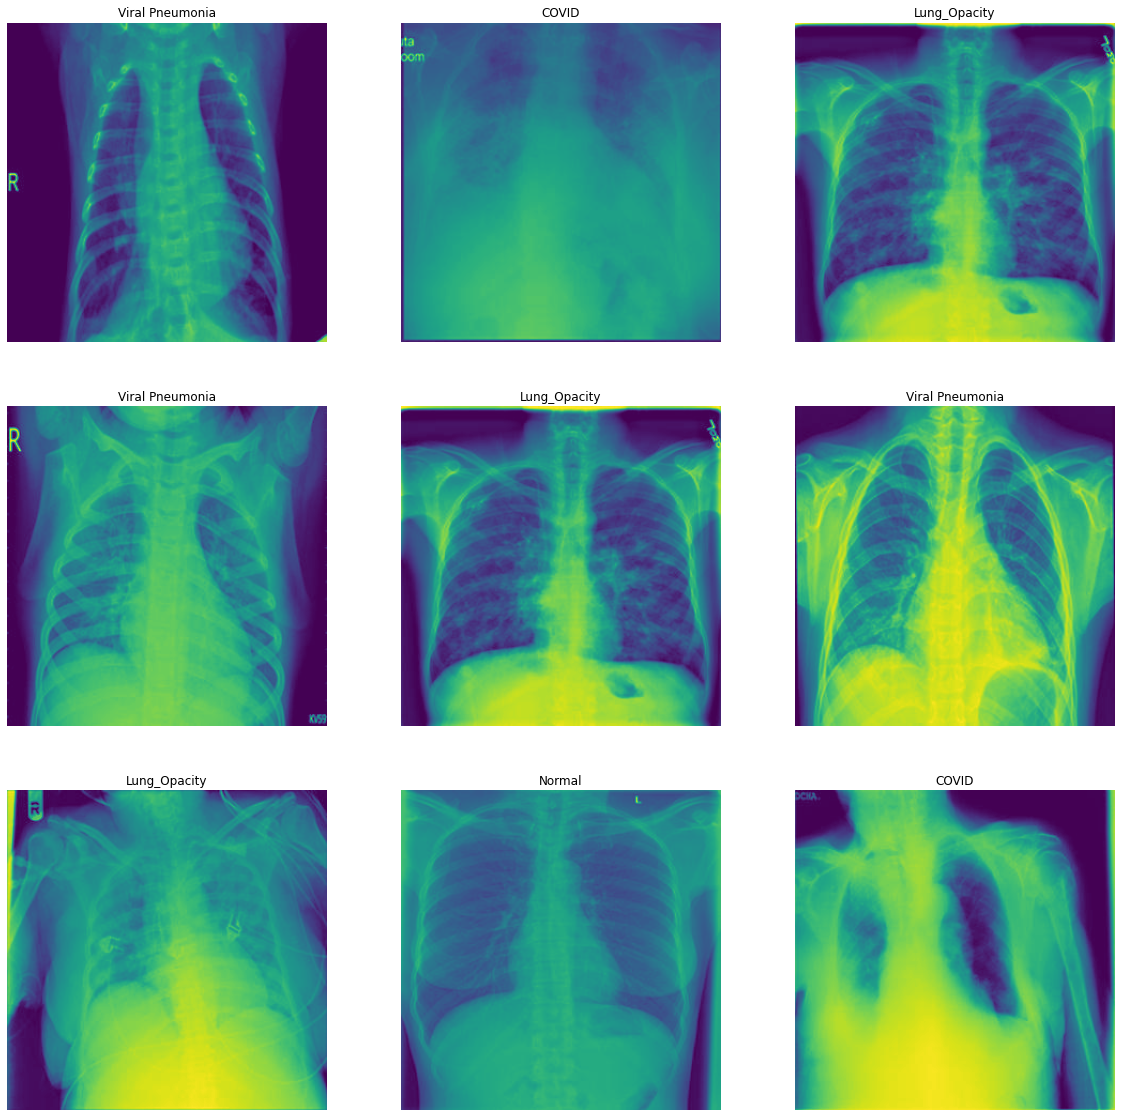

In [ ]:
plt.figure(figsize=(20,20))
class_ran = np.random.randint(0,4,9)
for n , i in enumerate(class_ran) : 
    plt.subplot(3,3,n+1)
    class_ = CATEGORIES[i]
    imgname  = os.listdir(datapath + CATEGORIES[i])[int(np.random.randint(0,5,1))]
    img = Image.open(datapath + CATEGORIES[i] + "/" + imgname)
    plt.imshow(img)  
    plt.title(class_)
    plt.axis('off')

VGG16

In [ ]:
VGG16_Model=tf.keras.applications.VGG16(
    include_top=False,    # Doesn't include the last dense layers[takes only convolution layer]
    weights="imagenet",   # Weights from imagenet dataset
    input_shape=(224,224,3) # Input image size
)
# TRAINABLE = True | NO TRANSFER LEARNING
VGG16_Model.trainable = False

In [ ]:
# Create the model
model = models.Sequential() # model -> sequential
# Add the VGGNET19 convolutional base model
model.add(VGG16_Model)
# Add last dense layers
model.add(layers.Flatten()) # flattening
#model.add(layers.Dropout(0.4)) # dropout 20%
model.add(layers.Dense(4, activation='softmax')) 

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 4)                 100356    
                                                                 
Total params: 14,815,044
Trainable params: 100,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
h = model.fit(train, epochs=2, batch_size=256, validation_data=val)

Epoch 1/2
462/462 [==============================] - 4162s 9s/step - loss: 0.3976 - accuracy: 0.8563 - val_loss: 0.3663 - val_accuracy: 0.8571
Epoch 2/2
462/462 [==============================] - 182s 393ms/step - loss: 0.2648 - accuracy: 0.9054 - val_loss: 0.2651 - val_accuracy: 0.9014


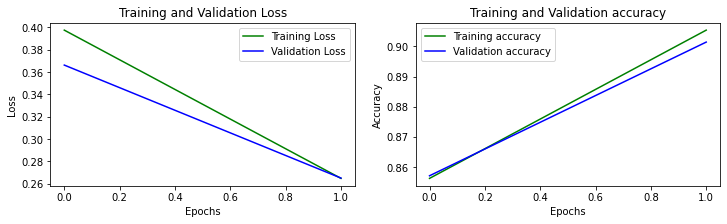

In [ ]:
def plots(h):
  plt.figure(figsize=(12,3))


  plt.subplot(1,2,2)
  plt.plot(h.history['accuracy'], 'g', label='Training accuracy')
  plt.plot(h.history['val_accuracy'], 'b', label='Validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  # Plotting training and validation losses against epochs
  
  plt.subplot(1,2,1)
  plt.plot(h.history['loss'], 'g', label='Training Loss')
  plt.plot(h.history['val_loss'], 'b', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
plots(h)

AlexNet

In [40]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4,activation='softmax')  
    
    
])

In [43]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 128)       46592     
                                                                 
 batch_normalization_10 (Bat  (None, 54, 54, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       819456    
                                                                 
 batch_normalization_11 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [45]:
h1 = model.fit(train, epochs=5, batch_size=256, validation_data=val)

Epoch 1/5
462/462 [==============================] - 82s 177ms/step - loss: 0.7195 - accuracy: 0.7193 - val_loss: 0.5847 - val_accuracy: 0.7638
Epoch 2/5
462/462 [==============================] - 80s 174ms/step - loss: 0.6490 - accuracy: 0.7471 - val_loss: 0.5613 - val_accuracy: 0.7818
Epoch 3/5
462/462 [==============================] - 80s 174ms/step - loss: 0.6138 - accuracy: 0.7608 - val_loss: 0.5491 - val_accuracy: 0.7924
Epoch 4/5
462/462 [==============================] - 81s 175ms/step - loss: 0.5770 - accuracy: 0.7735 - val_loss: 0.4981 - val_accuracy: 0.8085
Epoch 5/5
462/462 [==============================] - 81s 174ms/step - loss: 0.5442 - accuracy: 0.7909 - val_loss: 0.5213 - val_accuracy: 0.8043


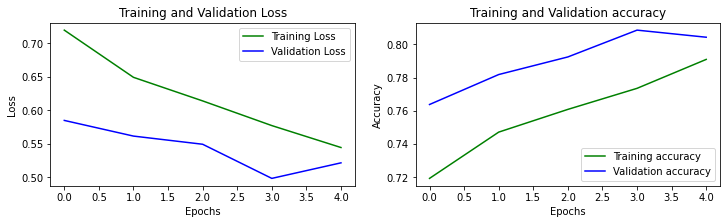

In [46]:
def plots(h1):
  plt.figure(figsize=(12,3))


  plt.subplot(1,2,2)
  plt.plot(h1.history['accuracy'], 'g', label='Training accuracy')
  plt.plot(h1.history['val_accuracy'], 'b', label='Validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  # Plotting training and validation losses against epochs
  
  plt.subplot(1,2,1)
  plt.plot(h1.history['loss'], 'g', label='Training Loss')
  plt.plot(h1.history['val_loss'], 'b', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
plots(h1)

**MobileNet**

In [47]:
Input_Shape = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=Input_Shape,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [48]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [49]:
model = tf.keras.Sequential([
                          base_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(4, activation='sigmoid')])

In [50]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
history = model.fit(train,epochs=5,validation_data=val)

Epoch 1/5
462/462 [==============================] - 84s 183ms/step - loss: 0.5601 - accuracy: 0.7934 - val_loss: 0.5361 - val_accuracy: 0.8009
Epoch 2/5
462/462 [==============================] - 82s 177ms/step - loss: 0.4935 - accuracy: 0.8180 - val_loss: 0.4877 - val_accuracy: 0.8231
Epoch 3/5
462/462 [==============================] - 91s 196ms/step - loss: 0.4576 - accuracy: 0.8328 - val_loss: 0.4651 - val_accuracy: 0.8294
Epoch 4/5
462/462 [==============================] - 82s 177ms/step - loss: 0.4330 - accuracy: 0.8424 - val_loss: 0.4452 - val_accuracy: 0.8377
Epoch 5/5
462/462 [==============================] - 82s 178ms/step - loss: 0.4150 - accuracy: 0.8491 - val_loss: 0.4293 - val_accuracy: 0.8411


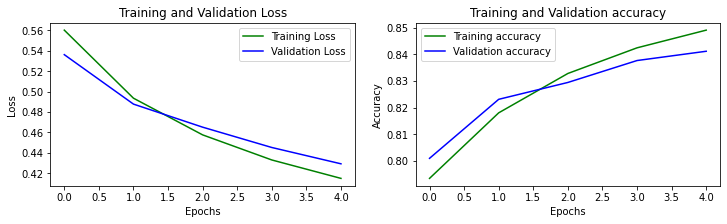

In [54]:
def plots(history):
  plt.figure(figsize=(12,3))


  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], 'g', label='Training accuracy')
  plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  # Plotting training and validation losses against epochs
  
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], 'g', label='Training Loss')
  plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
plots(history)